In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([[1, 50], [5, 20], [3, 80], [5,60]]).astype(np.float64)
y = np.array([0,0,1,1])

In [5]:
from sklearn.svm import SVC
svc_clf = SVC(C = 10, kernel ='linear')

In [6]:
svc_clf.fit(x,y)

SVC(C=10, kernel='linear')

In [7]:
svc_clf.coef_,svc_clf.intercept_,svc_clf.support_vectors_

(array([[0.06896552, 0.17241379]]),
 array([-9.68965517]),
 array([[ 1., 50.],
        [ 5., 60.]]))

# At decision boundry 
# w0*x0 + w1*x1 + b = 0
# x1 = -(w0/w1) * x0 - b/w1

In [8]:
def plot_svc_decision_boundry(svc_clf, xmin, xmax):
    w = svc_clf.coef_[0]
    b = svc_clf.intercept_[0]

    x0 = np.linspace(xmin,xmax, 200)
    decision_boundry = -(w[0]/w[1]) * x0 - b/w[1]
    margin = 1/w[1]

    gutter_up = decision_boundry + margin
    gutter_down = decision_boundry - margin

    svs = svc_clf.support_vectors_
    plt.scatter(svs[:,0], svs[:,1], s = 180)
    plt.plot(x0, decision_boundry,'k-')
    plt.plot(x0, gutter_up, 'k--')
    plt.plot(x0, gutter_down,'k--')

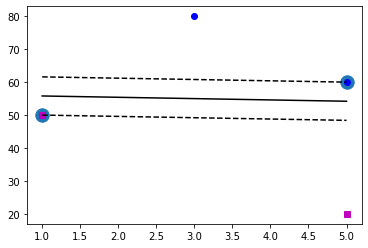

In [9]:
plt.plot(x[:,0][y==1], x[:,1][y==1],'bo')
plt.plot(x[:,0][y==0], x[:,1][y==0],'ms')
plot_svc_decision_boundry(svc_clf, 1, 5)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)

In [13]:
x_scaled

array([[-1.50755672, -0.11547005],
       [ 0.90453403, -1.5011107 ],
       [-0.30151134,  1.27017059],
       [ 0.90453403,  0.34641016]])

In [14]:
svc_clf.fit(x_scaled,y)

SVC(C=10, kernel='linear')

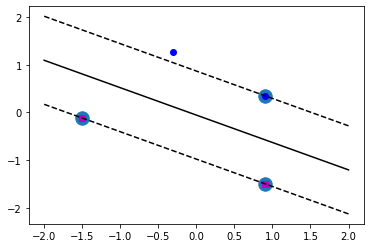

In [16]:
plt.plot(x_scaled[:,0][y==1], x_scaled[:,1][y==1],'bo')
plt.plot(x_scaled[:,0][y==0], x_scaled[:,1][y==0],'ms')
plot_svc_decision_boundry(svc_clf, -2, 2)
plt.show()

In [17]:
from sklearn.preprocessing import minmax_scale

In [18]:
x_min_max = minmax_scale(x)
x_min_max

array([[0.        , 0.5       ],
       [1.        , 0.        ],
       [0.5       , 1.        ],
       [1.        , 0.66666667]])

In [19]:
svc_clf.fit(x_min_max,y)

SVC(C=10, kernel='linear')

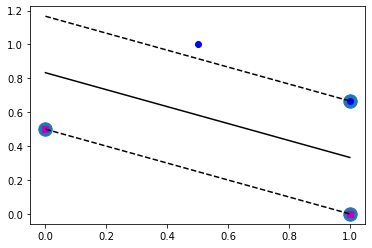

In [20]:
plt.plot(x_min_max[:,0][y==1], x_min_max[:,1][y==1],'bo')
plt.plot(x_min_max[:,0][y==0], x_min_max[:,1][y==0],'ms')
plot_svc_decision_boundry(svc_clf, 0, 1)
plt.show()